In [2]:
pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 1.9 MB/s eta 0:00:00


<ipython-input-4-31717fb8de3e>:7: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


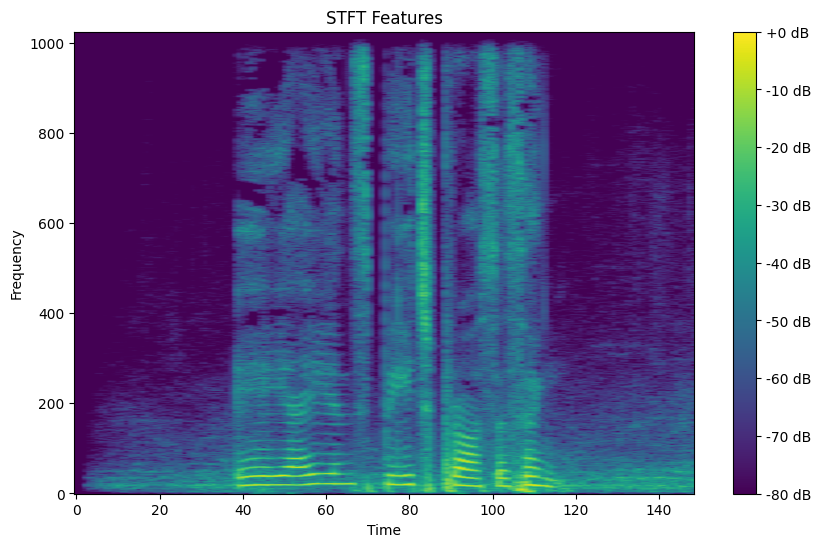

In [4]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Function to extract STFT features from audio file
def extract_stft_features(file_path, n_fft=2048, hop_length=512):
    audio, sr = librosa.load(file_path)
    stft = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))
    return stft

# Load speech data
audio_file_path = "/content/audioai.unknown"

# Extract STFT features
stft_features = extract_stft_features(audio_file_path)

# Plot STFT features
plt.figure(figsize=(10, 6))
plt.imshow(librosa.amplitude_to_db(stft_features, ref=np.max), cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Features')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


<ipython-input-21-7772aaeb64d4>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Log likelihood for training data: 123188.86950876903
Log likelihood for testing data: -1089567.1021199357


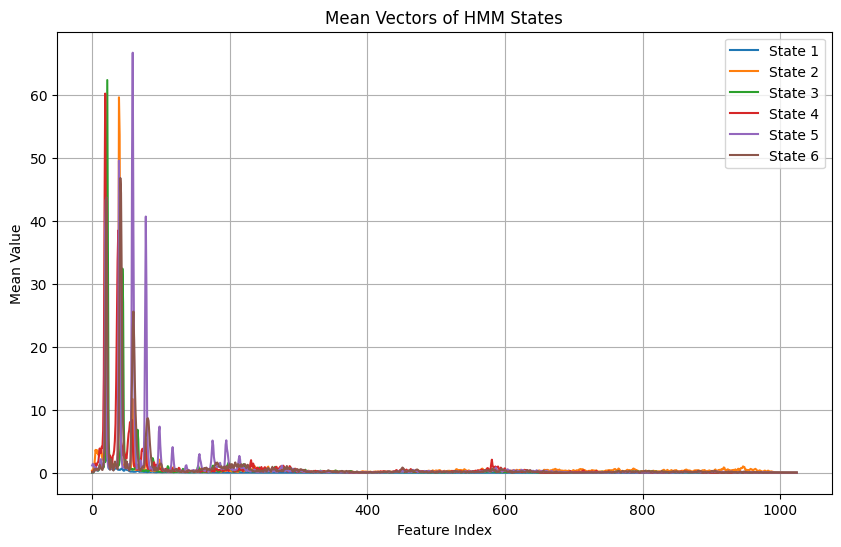

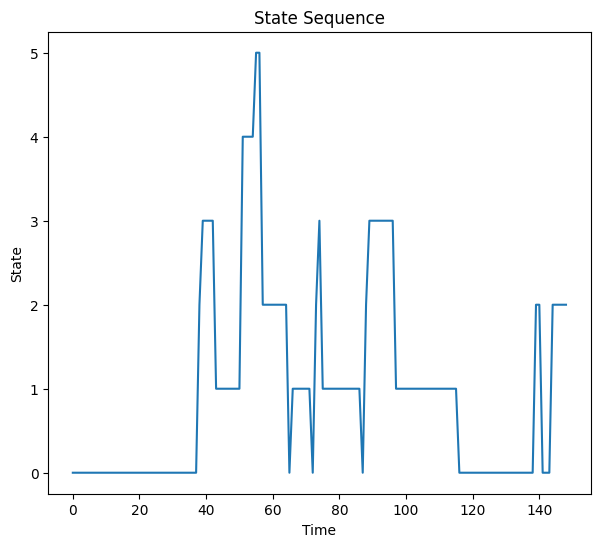

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from hmmlearn import hmm

# Function to extract STFT features from audio file
def extract_stft_features(file_path, n_fft=2048, hop_length=512):
    audio, sr = librosa.load(file_path)
    stft = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))
    return stft.T  # Transpose the STFT matrix to have time on the x-axis and frequency on the y-axis

# Load speech data
audio_file_path = "/content/audioai.unknown"

# Extract STFT features
features = extract_stft_features(audio_file_path)

# Split data into training and testing sets
train_data = features[:len(features)//2]
test_data = features[len(features)//2:]

# Define the number of states for the HMM
n_states = 6

# Initialize the HMM
model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag")

# Train the HMM
model.fit(train_data)

# Test the HMM
log_likelihood_train = model.score(train_data)
log_likelihood_test = model.score(test_data)

print(f"Log likelihood for training data: {log_likelihood_train}")
print(f"Log likelihood for testing data: {log_likelihood_test}")

# Visualize the HMM
plt.figure(figsize=(10, 6))
for i in range(n_states):
    plt.plot(model.means_[i], label=f'State {i+1}')
plt.title('Mean Vectors of HMM States')
plt.xlabel('Feature Index')
plt.ylabel('Mean Value')
plt.legend()
plt.grid()
plt.show()

# Get the most likely state sequence
state_sequence = model.predict(features)

# Visualize the state sequence
plt.figure(figsize=(7, 6))
plt.plot(state_sequence)
plt.title('State Sequence')
plt.xlabel('Time')
plt.ylabel('State')
plt.show()
